In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
train_data = pd.read_csv(r'D:\Visual Studio Code\ML\DataSet\Calories_Burn_Dataset\exercise.csv')
test_data =pd.read_csv(r'D:\Visual Studio Code\ML\DataSet\Calories_Burn_Dataset\calories.csv')

In [3]:
train_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
test_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
data = pd.concat([train_data,test_data['Calories']],axis=1)


In [8]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
data.shape

(15000, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
data.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Analysis

In [13]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

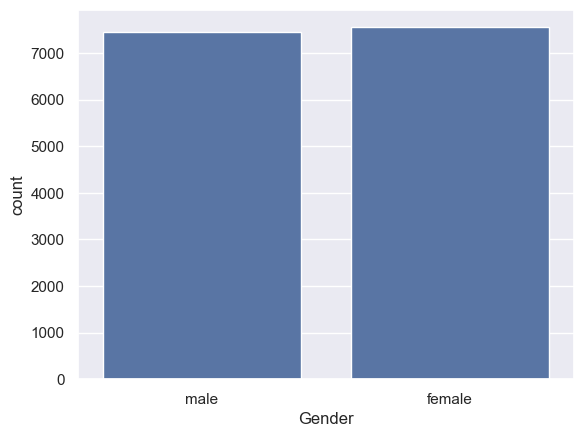

In [15]:
sns.set()
sns.countplot(x='Gender',data= data)

In [16]:
data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18392\2074404441.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

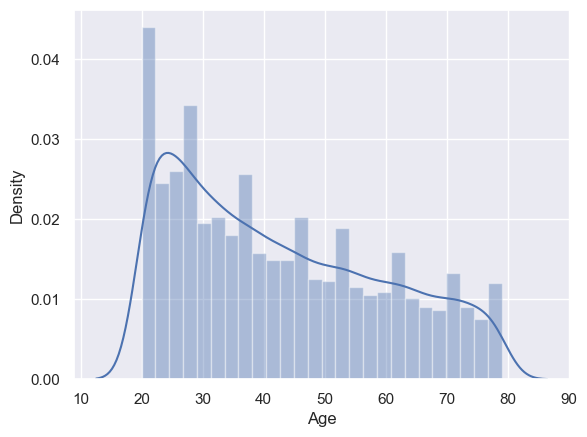

In [18]:
# Finding the distribution of "Age" Columns
sns.distplot(data['Age'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18392\3258719228.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

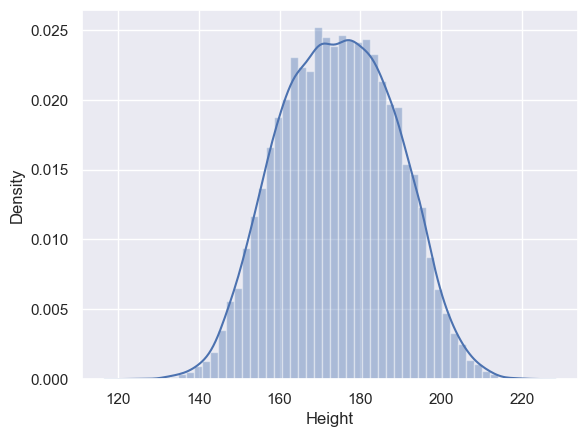

In [19]:
# Finding the distribution of "Height" Columns
sns.distplot(data['Height'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18392\289292859.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

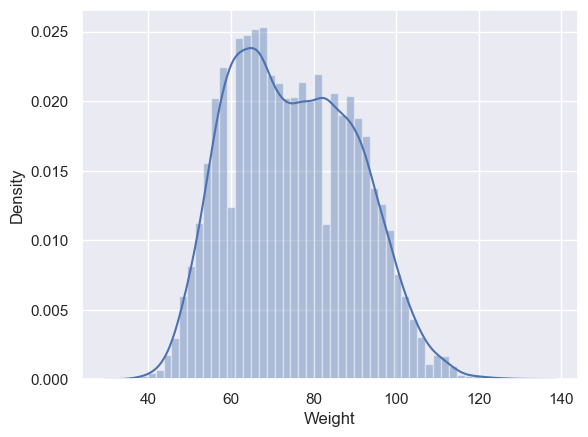

In [20]:
# Finding the distribution of "Weight" Columns
sns.distplot(data['Weight'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18392\1573837550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

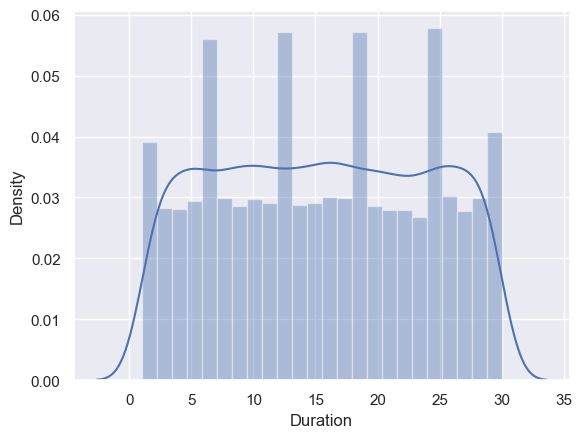

In [21]:
# Finding the distribution of "Duration" Columns
sns.distplot(data['Duration'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18392\1292481588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

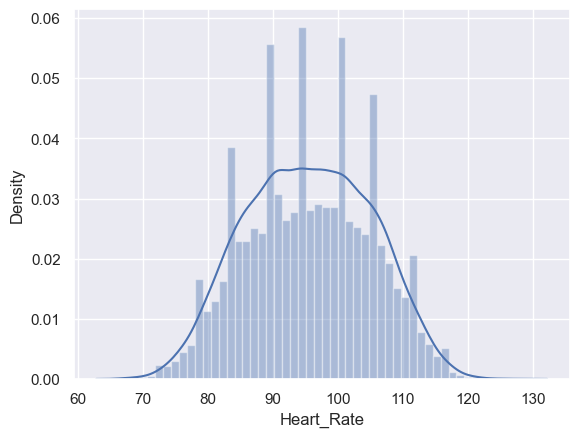

In [22]:
# Finding the distribution of "Heart_Rate" Columns
sns.distplot(data['Heart_Rate'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18392\2675394536.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

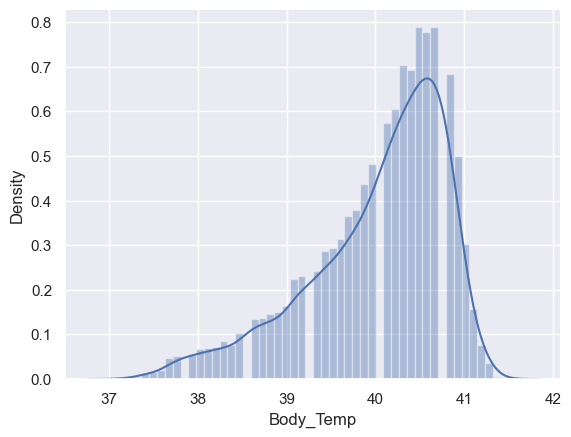

In [23]:
# Finding the distribution of "Body_Temp" Columns
sns.distplot(data['Body_Temp'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18392\1464429936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

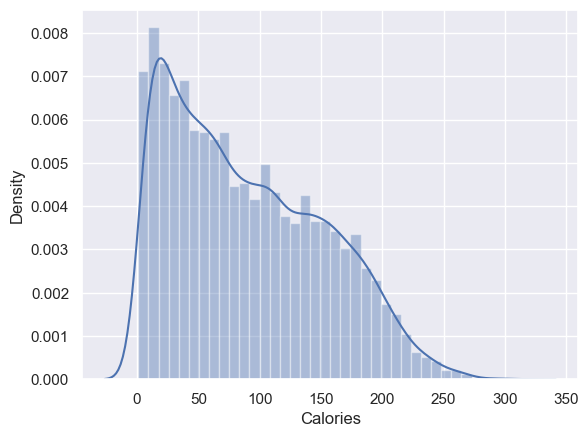

In [25]:
# Finding the distribution of "Calories" Columns
sns.distplot(data['Calories'])

# Finding the correlation in the dataset

In [29]:
Data = data.drop(columns=['User_ID','Gender'],axis= 1)

In [31]:
corr_relation =Data.corr()

<Axes: >

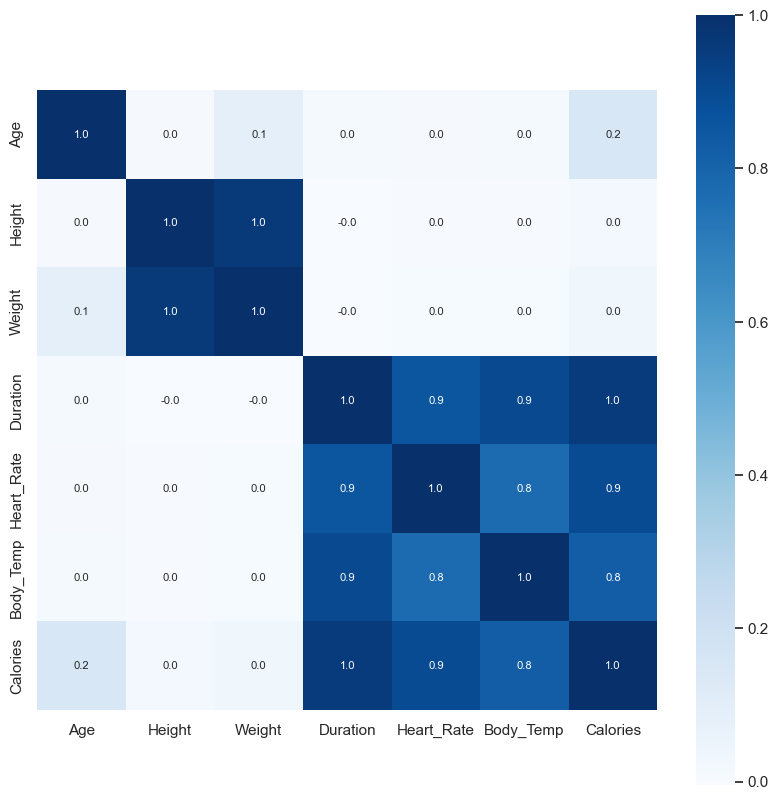

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_relation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [33]:
data.replace({'Gender':{'male':0,'female':1}},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18392\3111108099.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender':{'male':0,'female':1}},inplace=True)


# Seperating Feature and Target

In [35]:
x = data.drop(columns=['User_ID','Calories'],axis=1)
y= data['Calories']

In [36]:
#Spliting the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [38]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
#Predicting the training data
training_pred = model.predict(x_train)
r2 = r2_score(y_train,training_pred)
print(" R- square Error of Training data: ",r2)

 R- square Error of Training data:  0.9995691477017405


In [43]:
#Predicting the Testing data
testing_pred = model.predict(x_test)
r2 = r2_score(y_test,testing_pred)
print(" R- square Error of Training data: ",r2)

 R- square Error of Training data:  0.998800624504713


In [46]:
# Using Mean Absolute Error
mae = mean_absolute_error(y_test,testing_pred)
print("Mean Absolute Error of Testing data: ",mae)

Mean Absolute Error of Testing data:  1.4833678883314132
